In [140]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [155]:
data = pd.read_csv(r"traffic_volume.csv")

In [156]:
data

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,NaN,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,NaN,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,NaN,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450


In [157]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [158]:
data.tail()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
48199,NaN,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,NaN,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,NaN,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,NaN,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450
48203,NaN,282.12,0.0,0.0,Clouds,30-09-2018,23:00:00,954


In [159]:
data.columns

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')

In [160]:
data.shape

(48204, 8)

In [161]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [162]:
data.dtypes

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [164]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [165]:
from collections import Counter
print(Counter(data['rain']))
print(Counter(data['snow']))

Counter({0.0: 44735, 0.25: 948, 0.51: 256, 1.02: 123, 0.3: 121, 0.76: 109, 0.38: 99, 1.78: 91, 1.52: 69, 0.64: 55, 1.27: 50, 0.6: 32, 2.79: 29, 0.44: 26, 0.89: 25, 2.54: 23, 0.28: 23, 0.42: 21, 1.4: 21, 0.34: 20, 2.16: 19, 2.29: 19, 2.03: 19, 1.8: 16, 1.09: 16, 3.05: 15, 0.32: 15, 1.2: 15, 0.9: 15, 0.98: 14, 0.68: 13, 0.81: 13, 4.57: 13, 7.11: 12, 0.85: 12, 0.7: 11, 2.1: 11, 0.55: 11, 5.59: 10, 1.86: 10, 8.4: 10, 1.15: 10, 0.47: 9, 5.08: 9, 1.21: 9, 0.43: 9, 6.1: 9, 5.84: 8, 1.66: 8, 0.79: 8, 0.4: 8, 1.14: 8, 2.2: 8, 1.85: 8, 2.41: 8, 3.3: 8, 1.41: 7, 6.6: 7, 0.35: 7, 1.91: 7, 0.52: 7, 1.3: 7, 0.8: 7, 0.66: 7, 2.67: 7, 1.33: 7, 1.1: 7, 4.06: 7, 0.57: 6, 0.29: 6, 0.36: 6, 1.0: 6, 1.44: 6, 8.64: 6, 1.35: 6, 5.97: 6, 0.56: 6, 0.91: 6, 0.54: 6, 0.94: 6, 0.96: 6, 2.86: 6, 0.78: 6, 2.22: 6, 6.35: 6, 4.89: 6, 0.93: 6, 3.13: 6, 0.63: 6, 2.62: 6, 1.6: 6, 4.74: 6, 2.76: 6, 3.45: 6, 0.69: 5, 3.18: 5, 0.61: 5, 5.42: 5, 1.39: 5, 0.53: 5, 0.48: 5, 0.59: 5, 0.71: 5, 0.27: 5, 2.85: 5, 0.65: 5, 1.5: 5,

In [ ]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

In [169]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [ ]:
data['weather'].fillna('Clouds',inplace = True)

In [171]:
data.isnull().sum()

holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'])
data['holiday'] = le.fit_transform(data['holiday'])

In [173]:
#splitting the date into year, month, day
data[["day","month","year"]] = data["date"].str.split("-", expand = True)

In [175]:
#splitting the time into hours, minutes, seconds
data[["hours","minutes","seconds"]] = data["Time"].str.split(":", expand = True)

In [176]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [177]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,11,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [178]:
data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
traffic_volume    0
day               0
month             0
year              0
hours             0
minutes           0
seconds           0
dtype: int64

***DATA VISUALISATION***

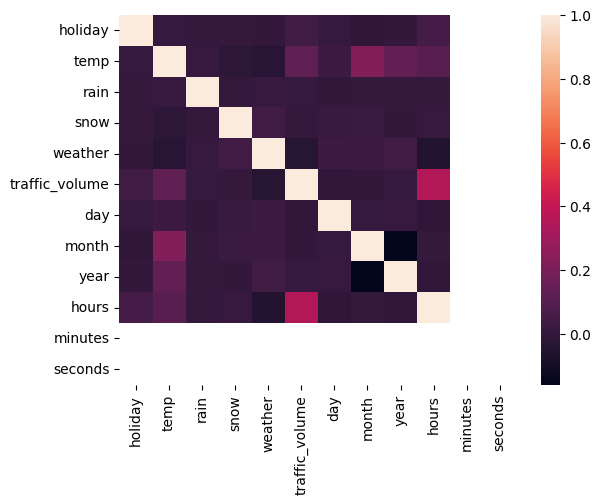

In [179]:
import seaborn as sns
dataplot = sns.heatmap(data.corr())

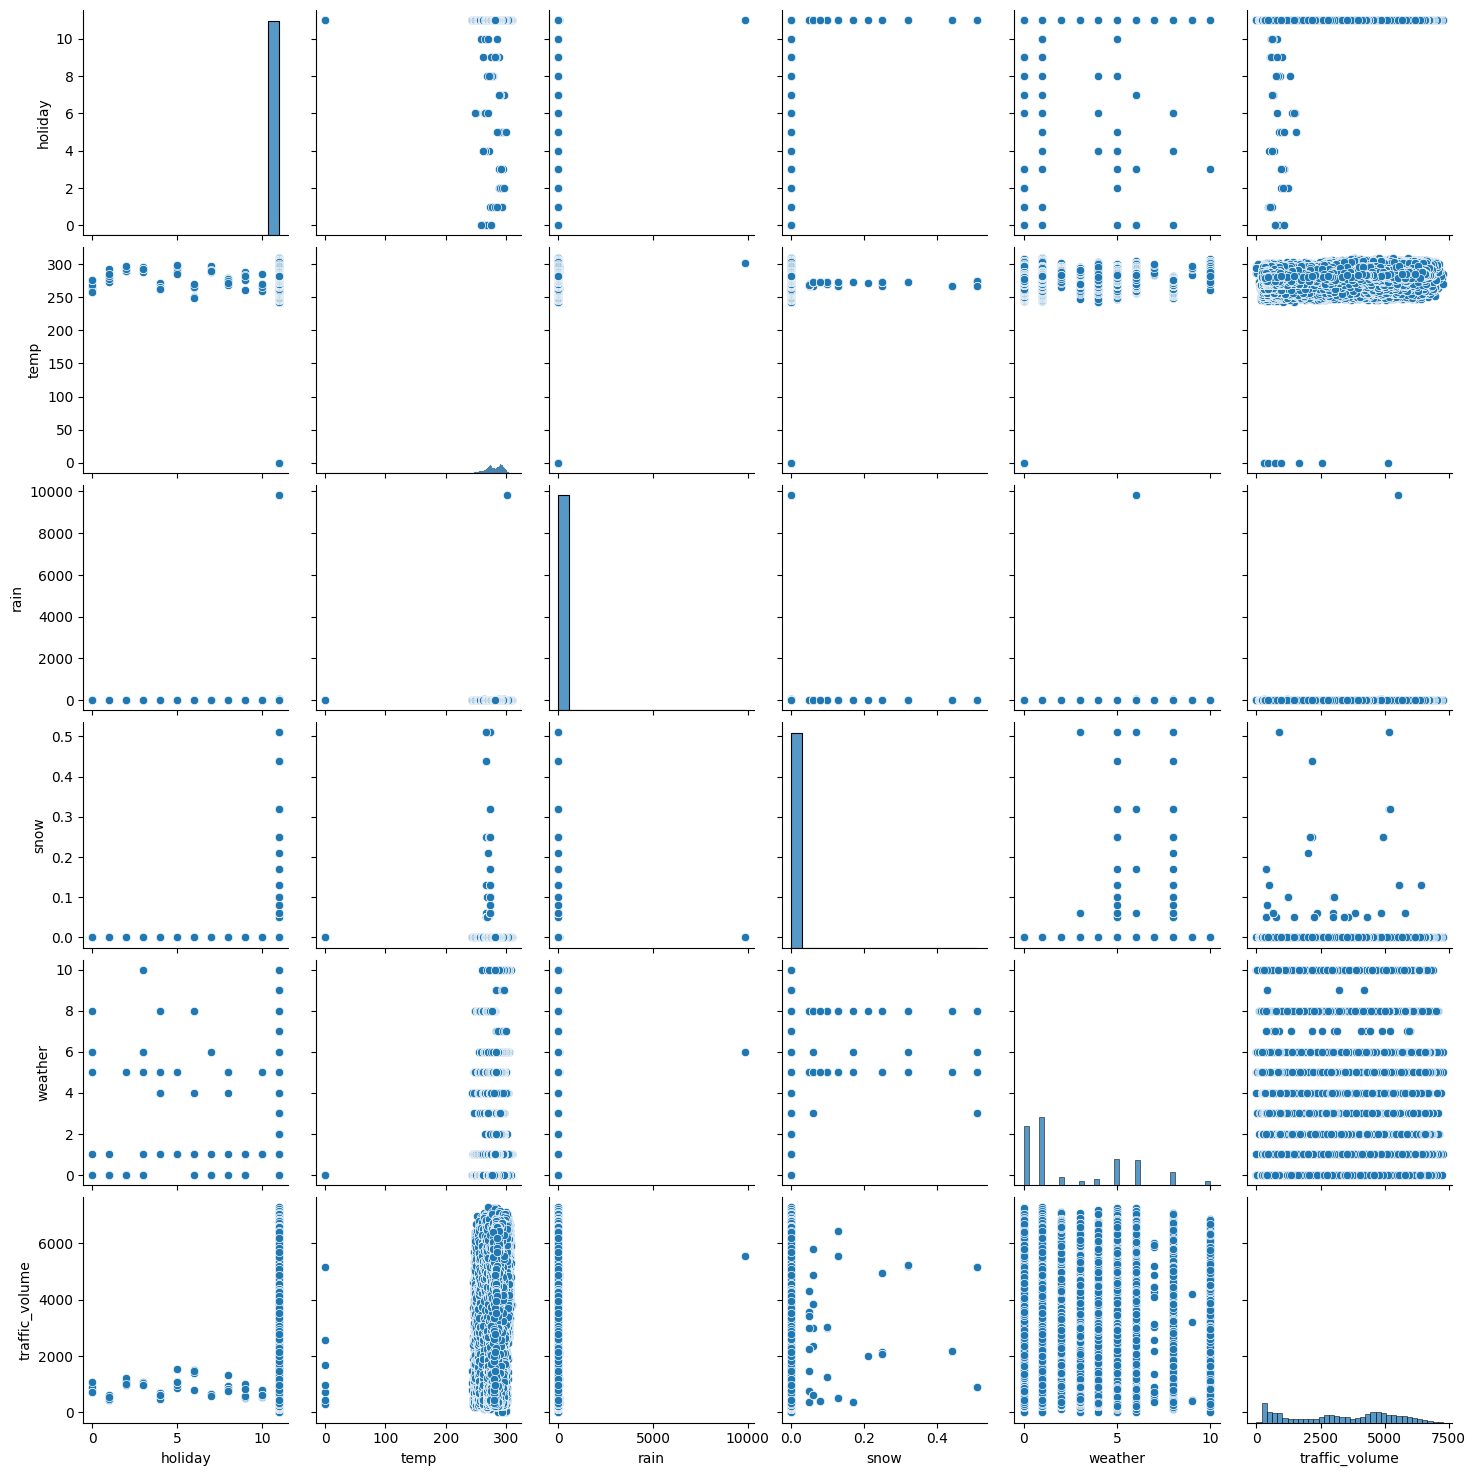

In [181]:
sns.pairplot(data)

<Axes: >

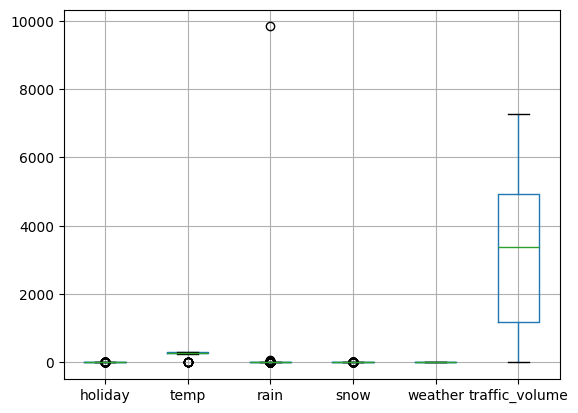

In [184]:
data.boxplot()

<Axes: ylabel='traffic_volume'>

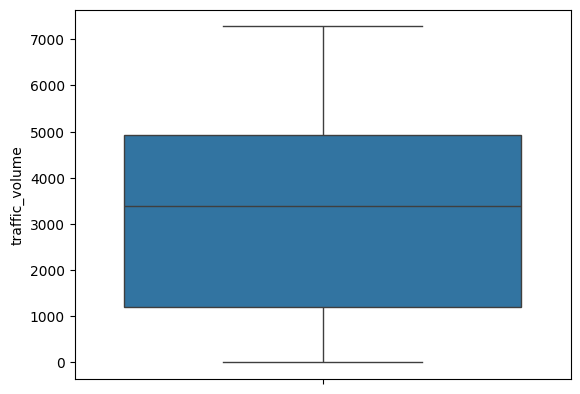

In [185]:
sns.boxplot(data['traffic_volume'])

In [186]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,11,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


***SPLITTING THE DATASET INTO DEPENDENT AND INDEPENDENT VARIABLES***

In [188]:
y = data['traffic_volume']
x = data.drop(columns=["traffic_volume"], axis=1)
x.shape
y.shape

(48204,)

***FEATURE SCALING***

In [190]:
names = x.columns

In [191]:
from sklearn.preprocessing import scale

In [192]:
x = scale(x)

In [193]:
x = pd.DataFrame(x,columns=names)

In [194]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


***SPLITTING THE DATA INTO TRAIN AND TEST***

In [195]:
from sklearn.model_selection import train_test_split
#Assuming you have 'x' as your independent variables and 'y' as your dependent variable
#Split the dataset into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

***MODEL BUILDING***

In [198]:
#initialise the model
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [199]:
#create and train the models
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [200]:
#fit models with x_train and y_train
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [201]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

***MODEL EVALUATION***

In [202]:
from sklearn import metrics

In [203]:
print(metrics.r2_score(p1, y_train))
print(metrics.r2_score(p2, y_train))
print(metrics.r2_score(p3, y_train))
print(metrics.r2_score(p4, y_train))
print(metrics.r2_score(p5, y_train))


-5.501515909731913
1.0
0.9746272777293533
-12.206690423423506
0.8463600277900696


***TESTING DATA FINDING R-SCORE***

In [204]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [205]:
print(metrics.r2_score(p1, y_test))
print(metrics.r2_score(p2, y_test))
print(metrics.r2_score(p3, y_test))
print(metrics.r2_score(p4, y_test))
print(metrics.r2_score(p5, y_test))

-5.365817964773308
0.6890266638598528
0.8029790746895952
-11.990577978126485
0.8047676682472229


***RANDOM FOREST GIVES R-SCORE***

In [206]:
MSE = metrics.mean_squared_error(p3,y_test)

In [208]:
np.sqrt(MSE)

np.float64(798.6033288585687)

***SAVING THE MODEL***

In [209]:
import pickle

In [210]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))

In [211]:
data.head()
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [ ]:
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

In [ ]:
x.shape

(48204, 8)

In [ ]:
y.shape

(48204,)